# Notebook for generating phenotype heatmap (Figure 1)

In [6]:
# Configutation part #

# Directory with phenotype
pheno_dir = './db/pheno'

####################### 

In [7]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
drug_names = ["Isoniazid", 
                "Rifampicin", 
                "Pyrazinamide", 
                "Ethambutol", 
                "Streptomycin",
                "Amikacin",
                "Kanamycin",
                "Capreomycin",
                "Ofloxacin",
                "Moxifloxacin",
                "Ciprofloxacin",
                "Ethionamide",
                "Prothionamide"
             ]

In [9]:
matrix = pd.DataFrame()
for pheno_file in drug_names:
    data = pd.read_csv(f"{pheno_dir}/{pheno_file}.pheno", sep='\t', index_col=0, header=None,
                      squeeze=True, names=[pheno_file.split(".")[0]])
    matrix = pd.merge(matrix, data, how='outer', left_index=True, right_index=True)
    
matrix_corr = matrix.corr()

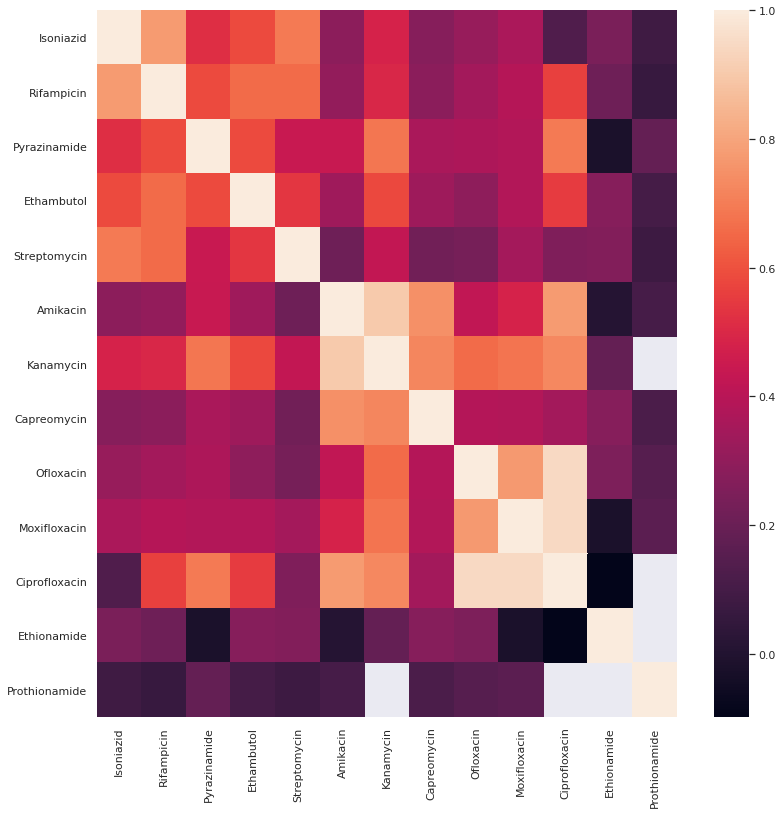

In [10]:
sns.set(rc={'figure.figsize':(13, 13)})
fig = sns.heatmap(matrix.corr(), annot = False)
plt.savefig('Fig1.png')